In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Percentiles

0-10 mins

In [2]:
v = [1, 7, 3, 9, 5]
v

[1, 7, 3, 9, 5]

In [3]:
Table(['Percent', 'Percentile']).with_rows([
   [ 1, percentile( 1, v)], 
   [10, percentile(10, v)], 
   [20, percentile(20, v)], 
   [39, percentile(39, v)], 
   [40, percentile(40, v)], 
   [41, percentile(41, v)], 
   [50, percentile(50, v)], 
])

Percent,Percentile
1,1
10,1
20,1
39,3
40,3
41,5
50,5


## Estimation

10-20 mins

In [4]:
sf = Table.read_table('http://inferentialthinking.com/notebooks/san_francisco_2015.csv').select(3, 11, 21)
sf.set_format(2, NumberFormatter(0))
sf = sf.where(2, are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


In [5]:
sf.sort(2)

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Public Service Trainee,"10,002"
Community Health,Special Nurse,"10,003"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,004"
Human Welfare & Neighborhood Development,Public Svc Aide-Public Works,"10,006"
Public Protection,EMT Paramedic,"10,009"
"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng","10,010"
Human Welfare & Neighborhood Development,Public Service Trainee,"10,010"
General Administration & Finance,Communications Systems Tech,"10,014"
Community Health,Patient Care Assistant,"10,015"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,017"


In [6]:
sf.sort(2, descending=True)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,"648,875"
General Administration & Finance,Asst Med Examiner,"480,509"
General Administration & Finance,Asst Med Examiner,"427,219"
"Public Works, Transportation & Commerce",Dept Head V,"426,686"
Community Health,"Adm, SFGH Medical Center","422,800"
Public Protection,"Chief, Fire Department","418,844"
"Public Works, Transportation & Commerce",Executive Contract Employee,"417,848"
Community Health,Senior Physician Specialist,"415,457"
Public Protection,Chief Of Police,"414,791"
"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept","405,050"


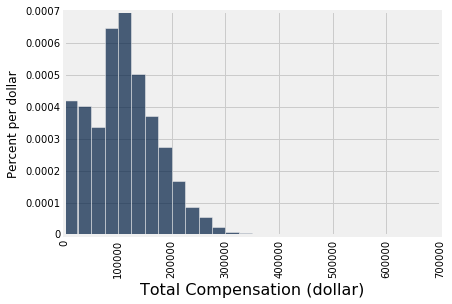

In [7]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist(2, bins=comp_bins, unit='dollar')

In [8]:
sample = sf.sample(200, with_replacement=False)
sample.show(3)

Organization Group,Job,Total Compensation
Public Protection,Deputy Sheriff,"130,701"
Community Health,Food Service Worker,"37,380"
General Administration & Finance,Administrative Analyst,"39,469"


In [9]:
np.median(sample.column(2))

108283.81

## Aside: lists and append

In [10]:
s = [2, 3]
s.append(4)
s

[2, 3, 4]

In [11]:
a = make_array(2, 3)
# a.append(4)
np.append(a, 4)
a

array([2, 3])

## Sample variability

20-35 mins

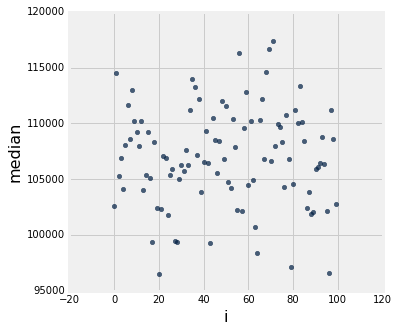

In [12]:
medians = []
repetitions = np.arange(100)
for i in repetitions:
    sample = sf.sample(200, with_replacement=False)
    medians.append(np.median(sample.column(2)))

Table().with_columns('i', repetitions, 'median', medians).scatter(0)

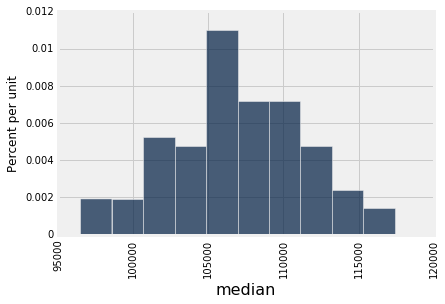

In [13]:
Table().with_columns('median', medians).hist(0)

In [14]:
percentile(2.5, medians)

97101.385000000009

In [15]:
percentile(97.5, medians)

116268.64999999999

In [16]:
print("95% of sample medians were between", 
      percentile(2.5, medians),
      "and",
      percentile(97.5, medians))

95% of sample medians were between 97101.385 and 116268.65


## Bootstrap

35-50 mins

In [19]:
sample # From now on, this is all we have.

Organization Group,Job,Total Compensation
Community Health,Food Service Worker,"83,011"
Public Protection,Police Officer 3,"187,637"
General Administration & Finance,IS Programmer Analyst-Senior,"142,960"
Public Protection,Firefighter,"162,889"
Community Health,Health Educator,"133,087"
Human Welfare & Neighborhood Development,IS Programmer Analyst-Senior,"46,706"
Public Protection,Deputy Sheriff (SFERS),"114,784"
Community Health,Physical Therapist,"157,021"
Human Welfare & Neighborhood Development,Senior Eligibility Worker,"74,109"
Community Health,Patient Svcs Finance Tech,"85,275"


In [21]:
np.median(sample.column(2))

102798.86

In [23]:
resample = sample.sample()
resample

Organization Group,Job,Total Compensation
Public Protection,Police Officer 3,"187,637"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"15,152"
"Public Works, Transportation & Commerce",Transit Operator,"120,681"
Public Protection,Court Reporter,"165,616"
General Administration & Finance,Custodian,"80,058"
General Administration & Finance,Senior Administrative Analyst,"124,858"
"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng","36,386"
General Administration & Finance,Senior Administrative Analyst,"143,763"
Public Protection,Court Reporter,"165,616"
"Public Works, Transportation & Commerce",Transit Operator,"123,999"


In [24]:
np.median(resample.column(2))

104191.47

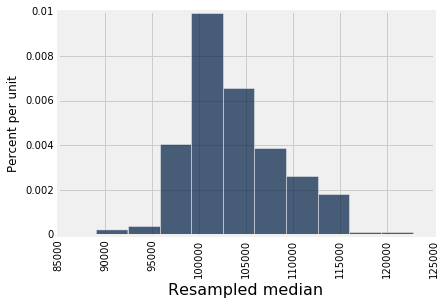

In [25]:
resampled_medians = []
for i in np.arange(1000):
    resample = sample.sample()
    median = np.median(resample.column(2))
    resampled_medians.append(median)
    
Table().with_column('Resampled median', resampled_medians).hist(0)

## Confidence Intervals

In [26]:
print("95% of resampled medians were between", 
      percentile(2.5, resampled_medians),
      "and",
      percentile(97.5, resampled_medians))

95% of resampled medians were between 96178.025 and 114783.75


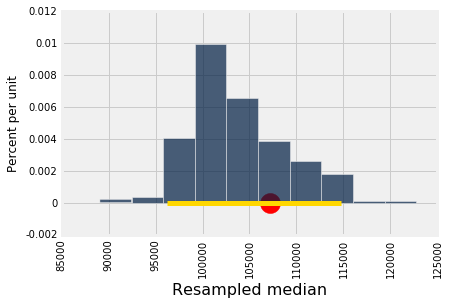

In [27]:
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist(0)
plt.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column(2))
plt.scatter(pop_median, 0, color='red', s=400)

In [28]:
sample_from_population = sf.sample(200)
print('Sample median:', np.median(sample_from_population.column(2)))

Sample median: 110186.51


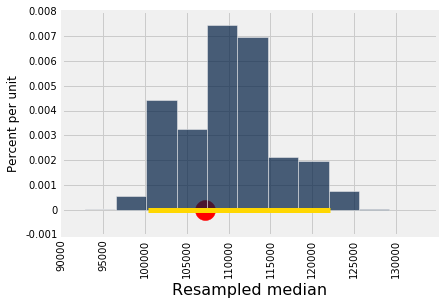

In [30]:
resampled_medians = []
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column(2))
    resampled_medians.append(median)
    
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist(0)
plt.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column(2))
plt.scatter(pop_median, 0, color='red', s=400)

In [31]:
intervals = Table(['Lower', 'Upper'])

for j in np.arange(100):
    sample_from_population = sf.sample(200)
    resampled_medians = []
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = np.median(resample.column(2))
        resampled_medians.append(median)

    interval_95 = [percentile(2.5, resampled_medians),
                   percentile(97.5, resampled_medians)]

    intervals.append(interval_95)
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [32]:
truth = np.median(sf.column(2))
correct = intervals.where('Lower', are.not_above(truth)).where('Upper', are.not_below(truth))
correct.num_rows

95